<a href="https://colab.research.google.com/github/Braian63/badepi_prg/blob/main/Badepi_prg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Análise de dados sobre os softwares registrados no Brasil<h1>

In [74]:
!pip install geopandas matplotlib


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd


In [5]:
badepi_prg_autor = pd.read_csv('badepiv10_prg_autor.csv', sep = ',', encoding = 'latin-1', low_memory = False, on_bad_lines = 'skip')
badepi_prg_depositante = pd.read_csv('badepiv10_prg_depositante.csv', sep = ',', encoding = 'latin-1', low_memory = False, on_bad_lines = 'skip')
badepi_prg_deposito = pd.read_csv('badepiv10_prg_deposito.csv', sep = ',', encoding = 'latin-1', low_memory = False, on_bad_lines = 'skip')
badepi_prg_despacho = pd.read_csv('badepiv10_prg_despacho.csv', sep = ',', encoding = 'latin-1', low_memory = False, on_bad_lines = 'skip')
badepi_prg_tipo = pd.read_csv('badepiv10_prg_tipo.csv', sep = ',', encoding = 'latin-1', low_memory = False, on_bad_lines = 'skip')

#

<h2>JUNTANDO OS ARQUIVOS CSV EM UM ÚNICO ARQUIVO<H2>

In [22]:
df_merged = pd.merge(badepi_prg_autor, badepi_prg_depositante, on='NO_PEDIDO', how='inner')


In [17]:
df_merged2 = pd.merge(badepi_prg_deposito, badepi_prg_despacho, on='NO_PEDIDO', how='inner')


In [18]:
df_merged3 = pd.merge(badepi_prg_tipo, df_merged, on='NO_PEDIDO', how='inner')

In [19]:
df_merged4 = pd.merge(df_merged3, df_merged2, on='NO_PEDIDO', how='inner')

<H2>RETIRANDO OS DADOS DUPLICADOS<H2>
Foi usado a coluna 'NO_PEDIDO' como base, para garantir a unicidade das informações.

In [27]:
badepi_analise = df_merged4.drop_duplicates(subset='NO_PEDIDO',keep='first')


Remoção das colunas repetidas.

In [32]:
badepi_final = badepi_analise.drop(columns=['CD_PAIS_PFPJ_y', 'CD_UF_PFPJ_y', 'NM_CIDADE_PFPJ_y'])

In [33]:
display(badepi_final)

,NO_PEDIDO,CD_TIPO_PROGRAMA,DS_TIPO_PROGRAMA,NO_CNPJ_CPF_x,NM_COMPLET_PFPJ_x,CD_PAIS_PFPJ_x,CD_UF_PFPJ_x,NM_CIDADE_PFPJ_x,CD_IBGE_CIDADE_x,DT_INICIO,...,CD_TIPO_PFPJ,NO_CNPJ_CPF_y,NM_COMPLET_PFPJ_y,CD_IBGE_CIDADE_y,DT_ENTRADA_INPI,NM_TITULO_PROGRAMA,NO_RPI,DT_PUBLICACAO,CD_DESPACH,DS_DESPACH
0,34732,AP-01,APLICATIVO - APLICATIVOS,***413917**,SILVIO LUIS COUTO DE SÁ,BR,RJ,RIO DE JANEIRO,0,10/11/2000,...,F,***562447**,VINICIUS SAVIANO MENDES DA SILVA,3304557,10/11/2000,CLICKADINHA ELETRÔNICA,2086,28/12/2010,82,Pedido em exigência devido a irregularidades.
16,34744,SO-05,Geren Usuar - Gerenciador de Usuários,***171058**,MARCOS CÉSAR AUGUSTO,BR,PR,LONDRINA,0,13/11/2000,...,J,03925630000165,SITE DO COMPRADOR LTDA - ME,4113700,07/11/2000,CENTRAL DO COMPRADOR,2086,28/12/2010,82,Pedido em exigência devido a irregularidades.
31,34756,AP-01,APLICATIVO - APLICATIVOS,***169338**,INÊS MORALES LOPES DE AGUILAR,BR,SP,SÃO PAULO,0,14/11/2000,...,J,43440056000170,CÍRCULO DO LIVRO LTDA,3505708,09/11/2000,SISTEMA CLUBE,2086,28/12/2010,82,Pedido em exigência devido a irregularidades.
49,34761,TI-03,Transm Dados - Transmissäo de Dados,***972898**,OSCAR DE SOUZA SANCHES,BR,SP,SOROCABA,0,14/11/2000,...,J,45397007000127,SPLICE DO BRASIL TELECOMUNICAÇÕES E ELETRÔNICA...,3557006,10/11/2000,CHAMA TP SPLICE VERSÃO 1.00,1951,27/05/2008,90,Deferimento de pedido de registro de programa ...
57,34785,GI-01,Gerenc Info - Gerenciador de Informaçöes,***786748**,ANA TEREZA ZABINI,BR,SP,SÃO PAULO,0,14/11/2000,...,J,61564639000194,CNEC ENGENHARIA S/A,3550308,10/11/2000,SISTEMA DE GESTÃO E VISUALIZAÇÃO DE INFORMAÇÕE...,2086,28/12/2010,82,Pedido em exigência devido a irregularidades.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863885,512023002781,GI-01,Gerenc Info - Gerenciador de Informaçöes,***499924**,RANILSON OSCAR ARAÚJO PAIVA,BR,AL,MACEIÓ,0,18/09/2023,...,J,01203327000123,CESAR - CENTRO DE ESTUDOS E SISTEMAS AVANÇADOS...,2611606,18/09/2023,Plugin do Moodle: Bloco de listagem de cursos ...,2751,26/09/2023,730,Expedição do Certificado de Registro
863975,512023002782,AV-02,Cont Recurs - Contabilizaçäo de Recursos,***157221**,MARCIA NAYANE ROCHA SANTANA,BR,GO,SENADOR CANEDO,0,18/09/2023,...,J,24819041000172,MN CONSULTORIA E SOLUÇÕES LTDA,5220454,18/09/2023,ReCal - RSU,2751,26/09/2023,730,Expedição do Certificado de Registro
863980,512023002783,SM-03,Sim Amb Op - Simuladores de Ambiente Operacional,***122264**,EDUARDO GEBER DE MELO ALBUQUERQUE,BR,PE,JABOATÃO DOS GUARARAPES,0,18/09/2023,...,F,***971564**,ALEXANDRE JOSÉ HENRIQUE DE OLIVEIRA LUNA,2611606,18/09/2023,MASTER-PM - vU1 (3D),2751,26/09/2023,730,Expedição do Certificado de Registro
863996,512023002784,DS-04,Desv c/Metd - Aplicativos Desenvolv. Sist. d...,***682861**,JEFFERSON CARLOS SANCHES DE FARIA,BR,GO,JATAÍ,0,18/09/2023,...,J,10870883000144,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",5208707,18/09/2023,PANC do Cerrado,2751,26/09/2023,730,Expedição do Certificado de Registro


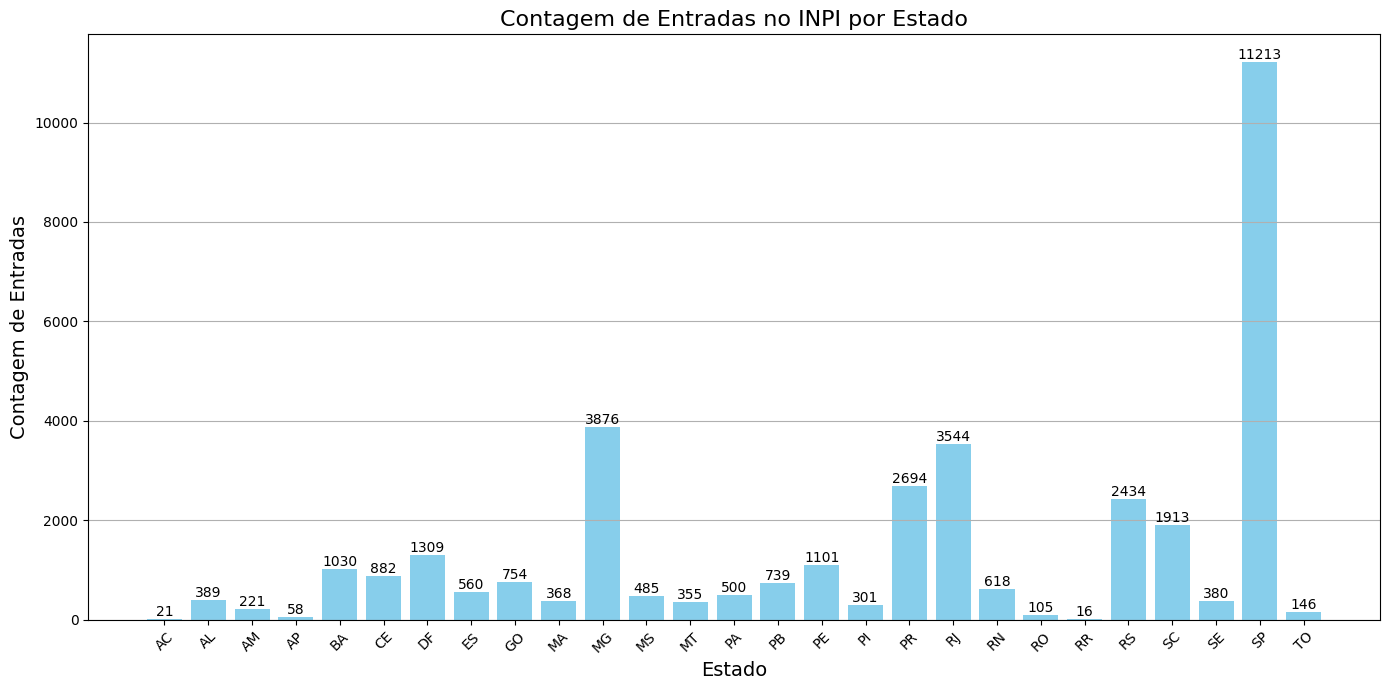

In [66]:
estado = badepi_final.groupby(['CD_UF_PFPJ_x']).size().reset_index(name='contagem')
estado = estado.drop(estado[estado['CD_UF_PFPJ_x'].isin(['RD', 'XX'])].index)
# Criando o gráfico para estados
plt.figure(figsize=(14, 7))
bars_estado = plt.bar(estado['CD_UF_PFPJ_x'], estado['contagem'], color='skyblue')
plt.title('Contagem de Entradas no INPI por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Contagem de Entradas', fontsize=14)
plt.xticks(rotation=45)

for bar in bars_estado:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

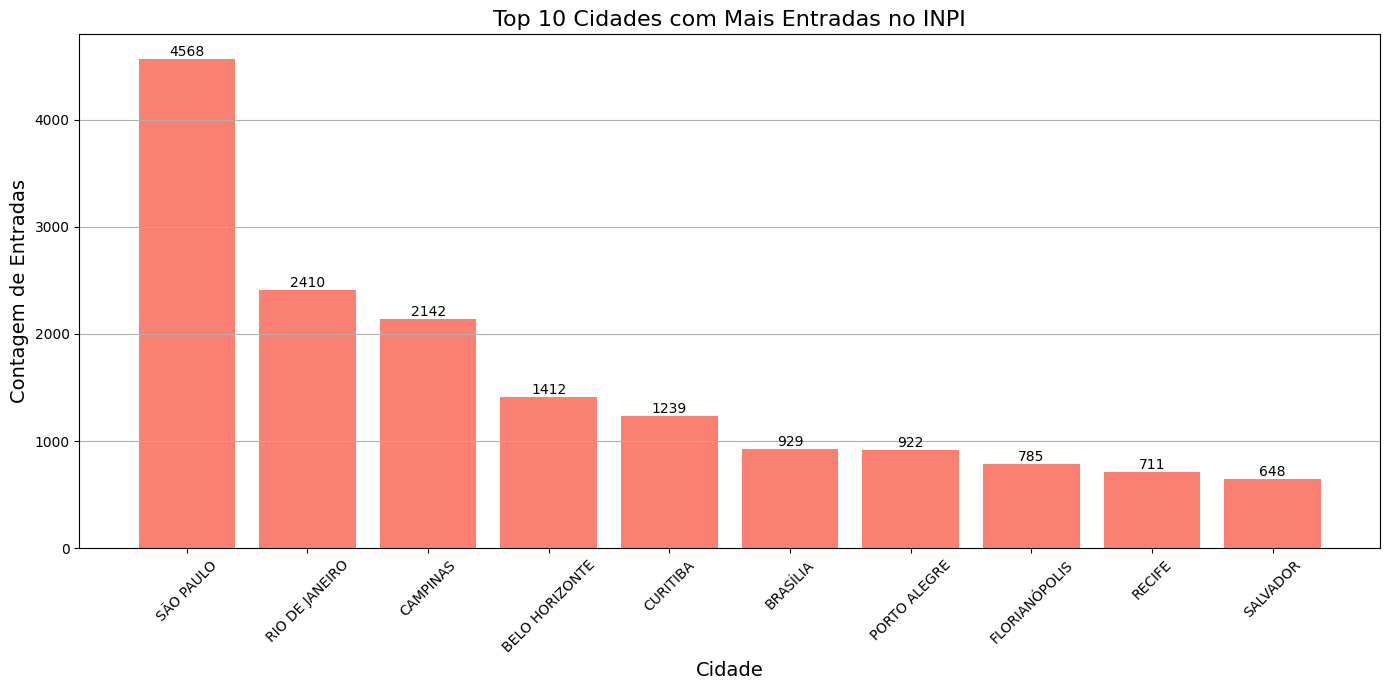

In [65]:
# Contagem por cidade
cidade_contagem = badepi_final.groupby('NM_CIDADE_PFPJ_x').size().reset_index(name='contagem')

top_cidades = cidade_contagem.nlargest(10, 'contagem')

plt.figure(figsize=(14, 7))
bars_cidade = plt.bar(top_cidades['NM_CIDADE_PFPJ_x'], top_cidades['contagem'], color='salmon')
plt.title('Top 10 Cidades com Mais Entradas no INPI', fontsize=16)
plt.xlabel('Cidade', fontsize=14)
plt.ylabel('Contagem de Entradas', fontsize=14)
plt.xticks(rotation=45)

for bar in bars_cidade:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y')
plt.tight_layout()
plt.show()


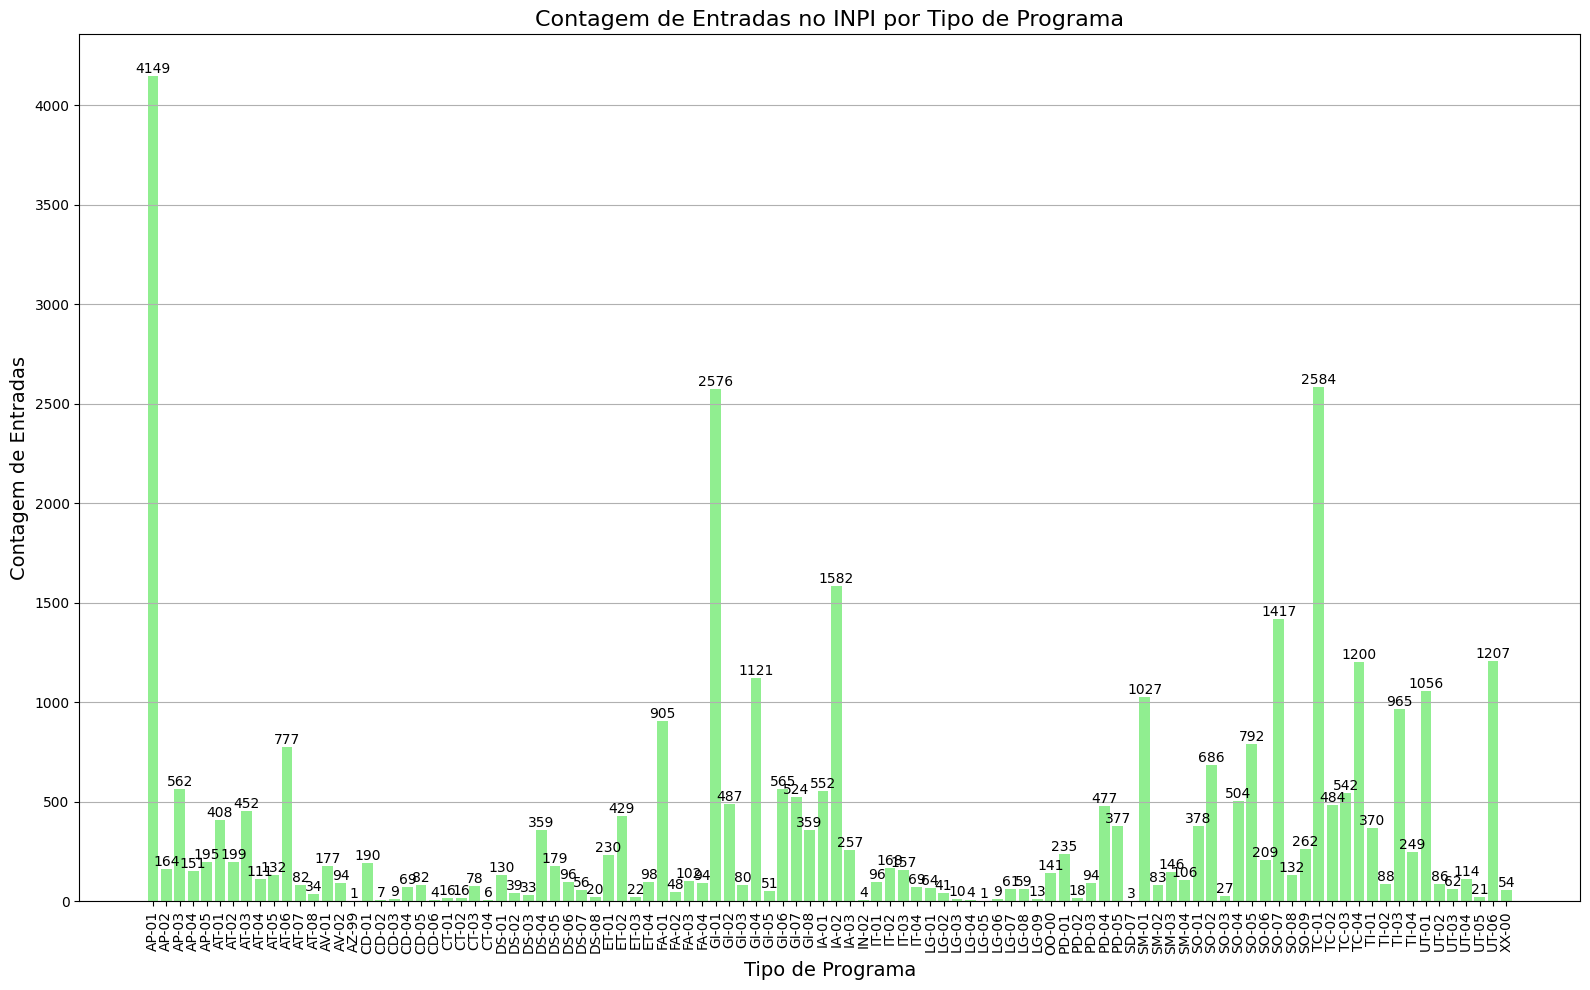

In [69]:
# Contagem por tipo de programa
tipo_programa_contagem = badepi_final.groupby('CD_TIPO_PROGRAMA').size().reset_index(name='contagem')

# Criando o gráfico para tipo de programa
plt.figure(figsize=(16, 10))  # Aumentando o tamanho da figura
bars_tipo_programa = plt.bar(tipo_programa_contagem['CD_TIPO_PROGRAMA'], tipo_programa_contagem['contagem'], color='lightgreen')
plt.title('Contagem de Entradas no INPI por Tipo de Programa', fontsize=16)
plt.xlabel('Tipo de Programa', fontsize=14)
plt.ylabel('Contagem de Entradas', fontsize=14)
plt.xticks(rotation=90)  # Rotacionando para melhor legibilidade

# Anotações nas barras
for bar in bars_tipo_programa:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y')
plt.tight_layout()

# Exibindo o gráfico
plt.show()



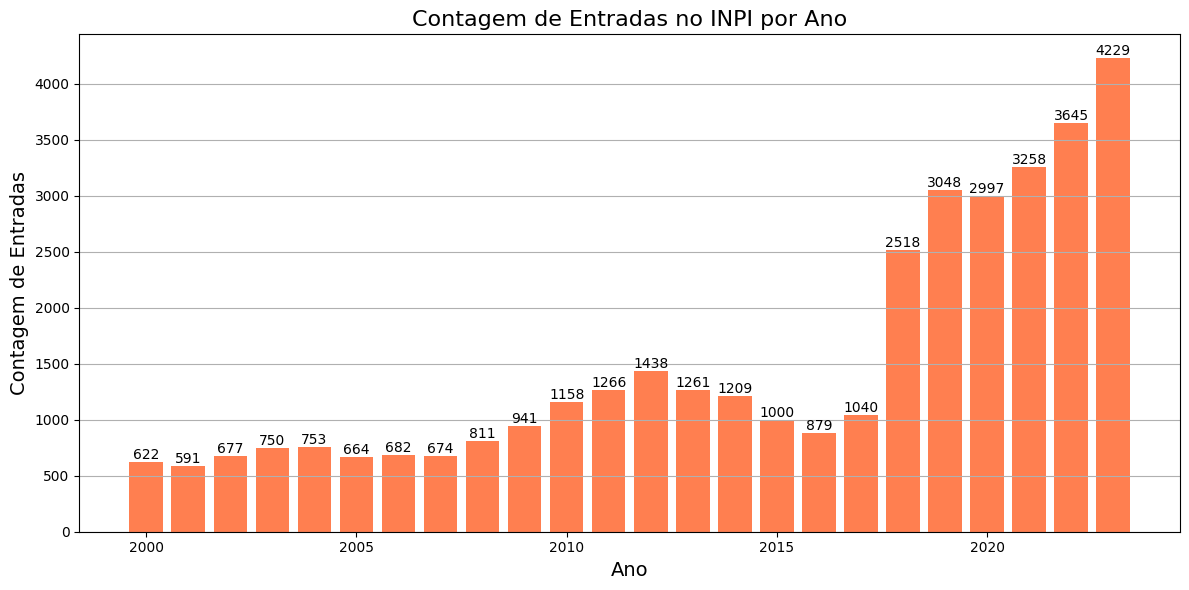

In [71]:

badepi_final['DT_ENTRADA_INPI'] = pd.to_datetime(badepi_final['DT_ENTRADA_INPI'], dayfirst=True)

# Agrupando os dados por ano
entrada_por_ano = badepi_final.groupby(badepi_final['DT_ENTRADA_INPI'].dt.year).size().reset_index(name='contagem')

plt.figure(figsize=(12, 6))
bars_ano = plt.bar(entrada_por_ano['DT_ENTRADA_INPI'], entrada_por_ano['contagem'], color='coral')
plt.title('Contagem de Entradas no INPI por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Contagem de Entradas', fontsize=14)

for bar in bars_ano:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y')
plt.tight_layout()

plt.show()



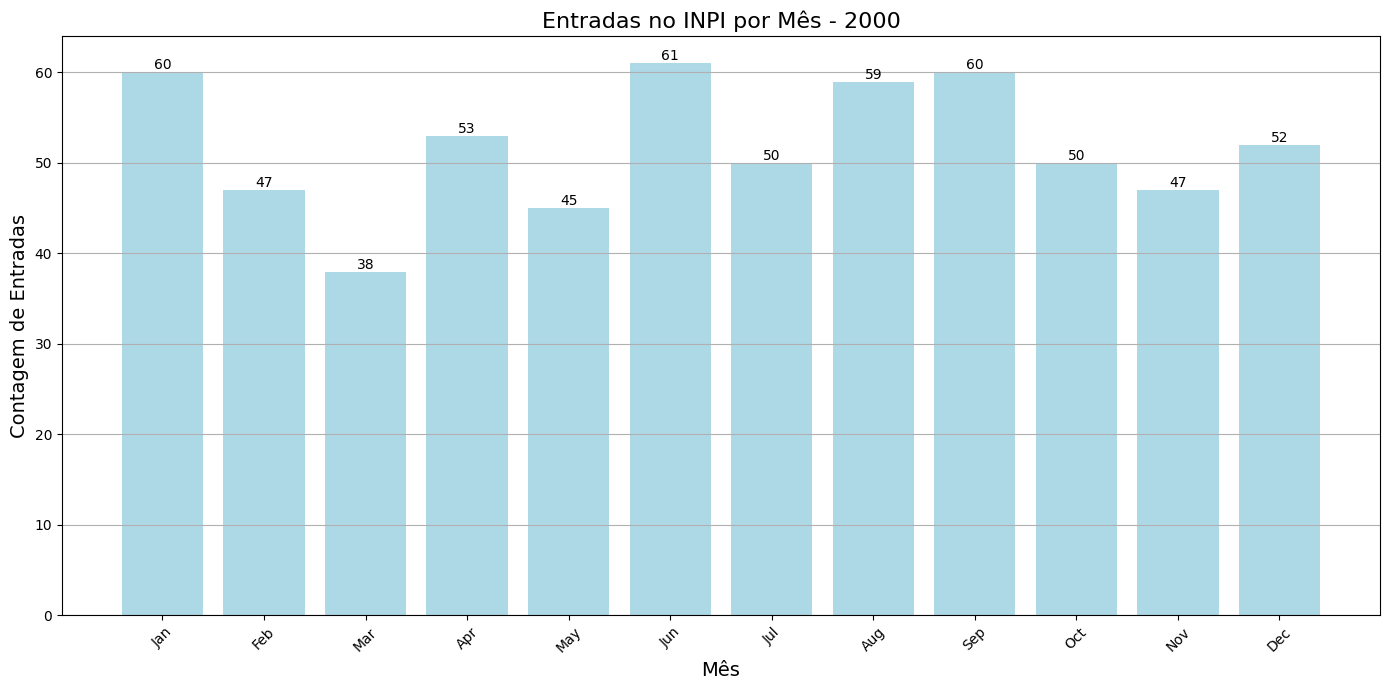

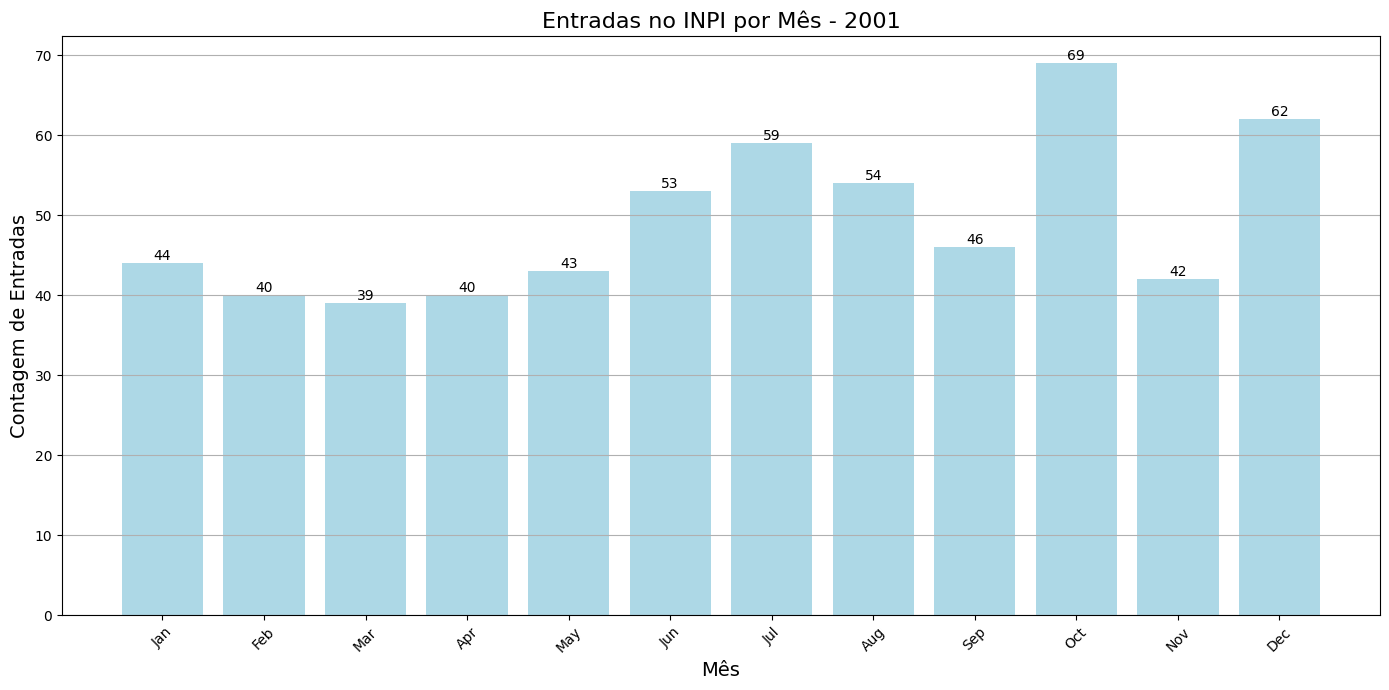

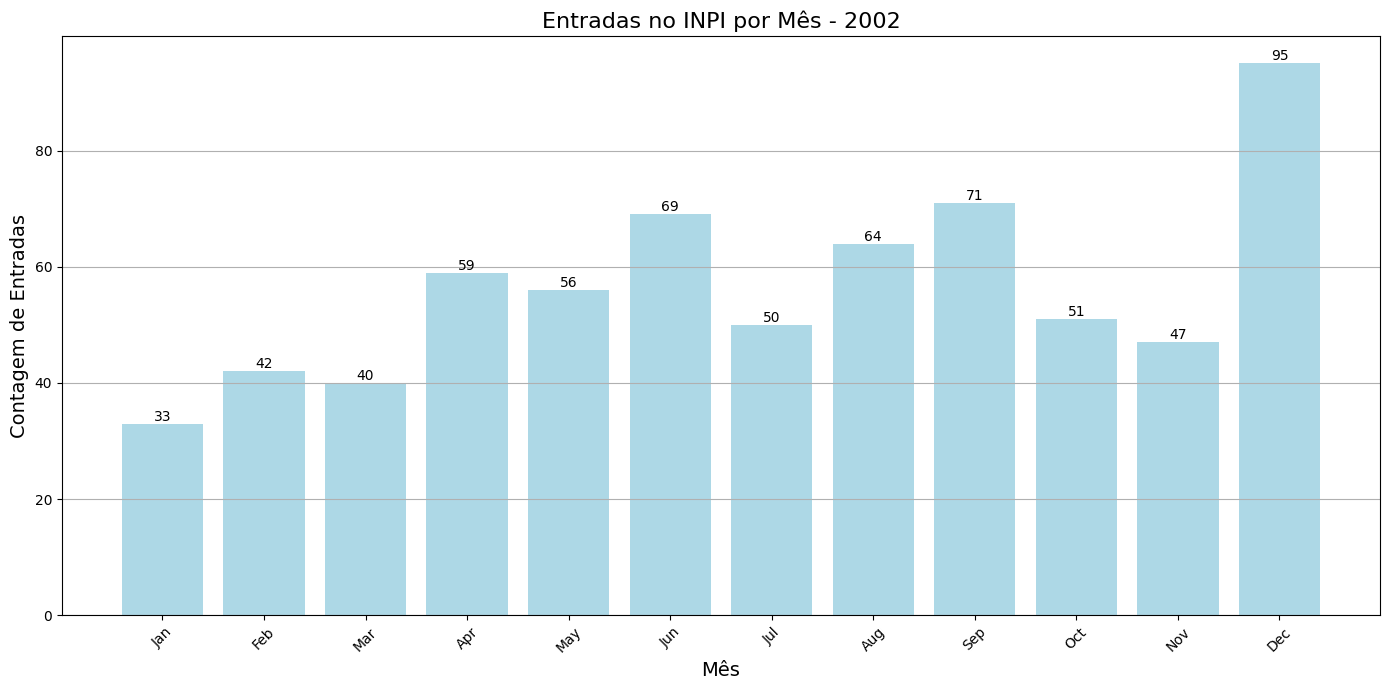

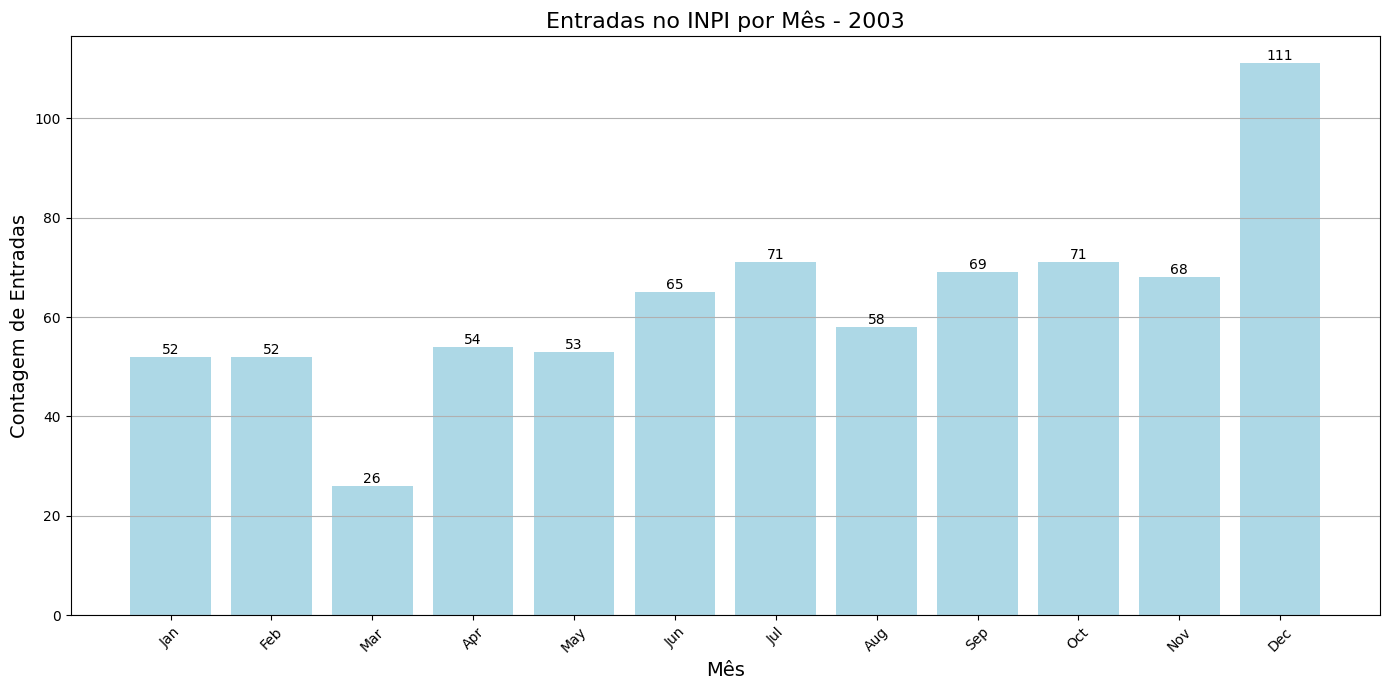

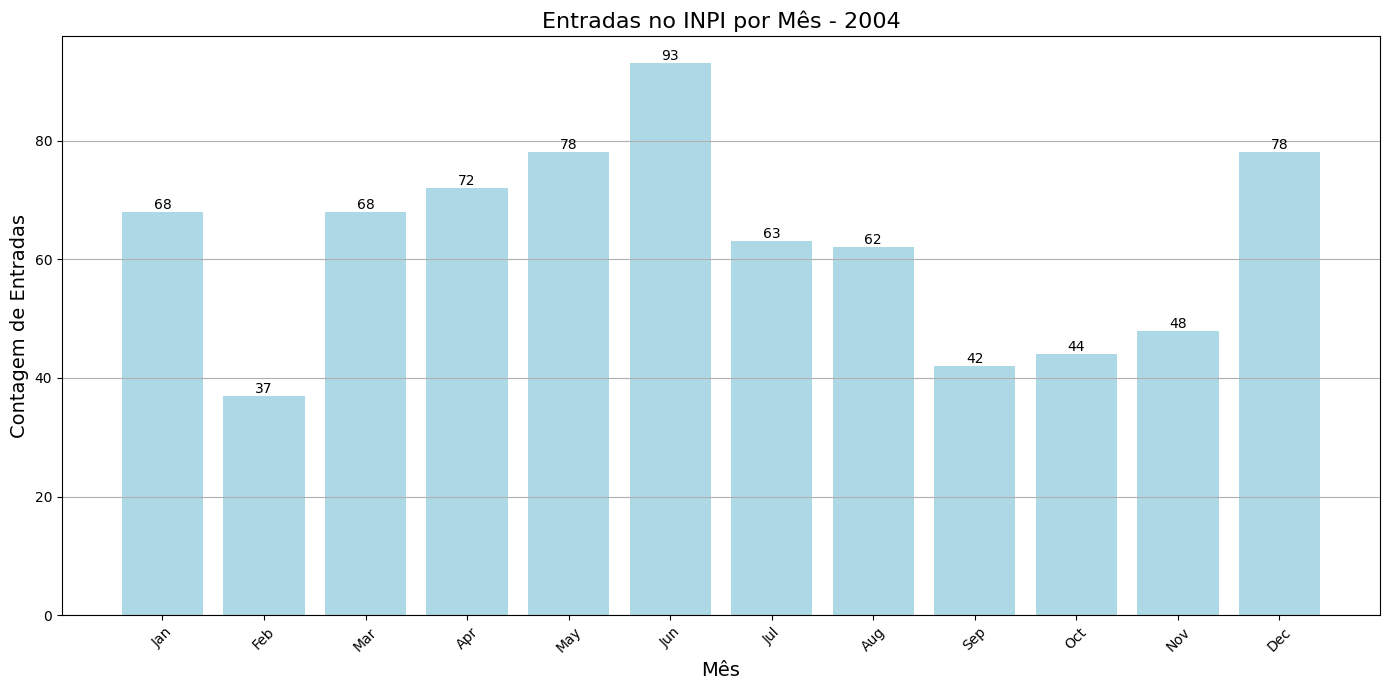

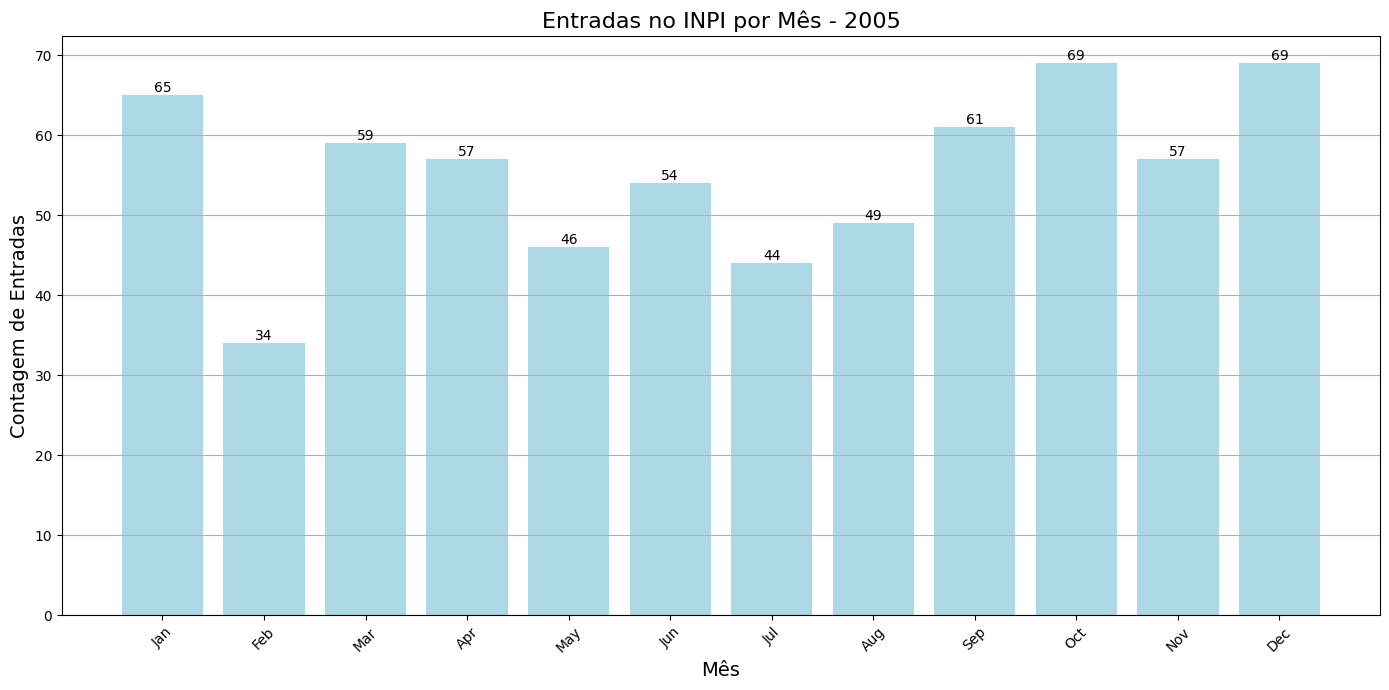

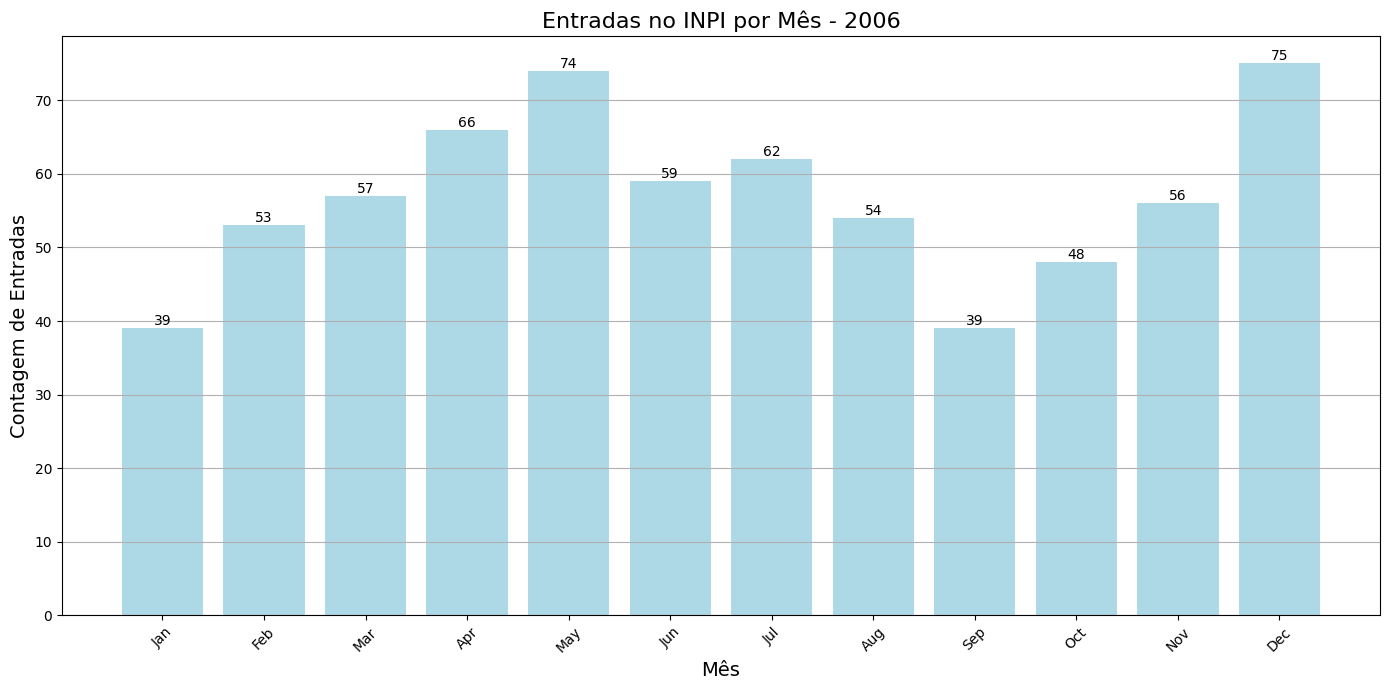

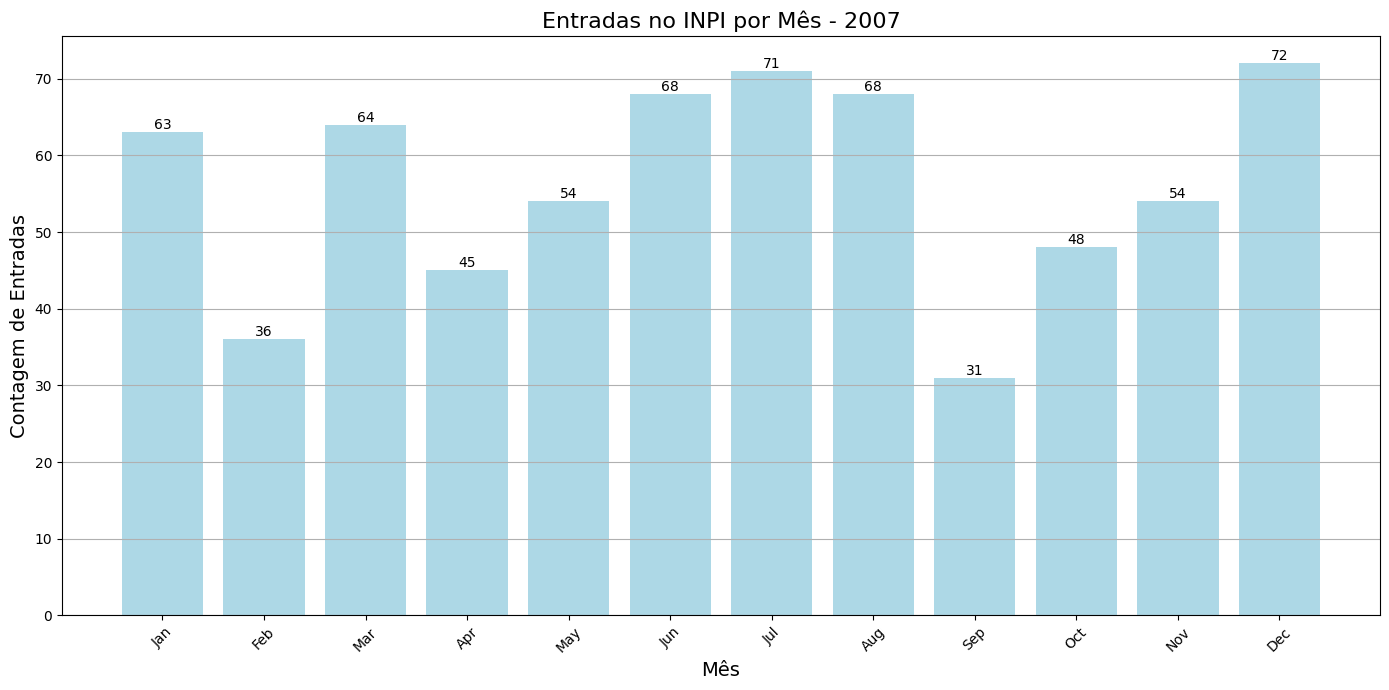

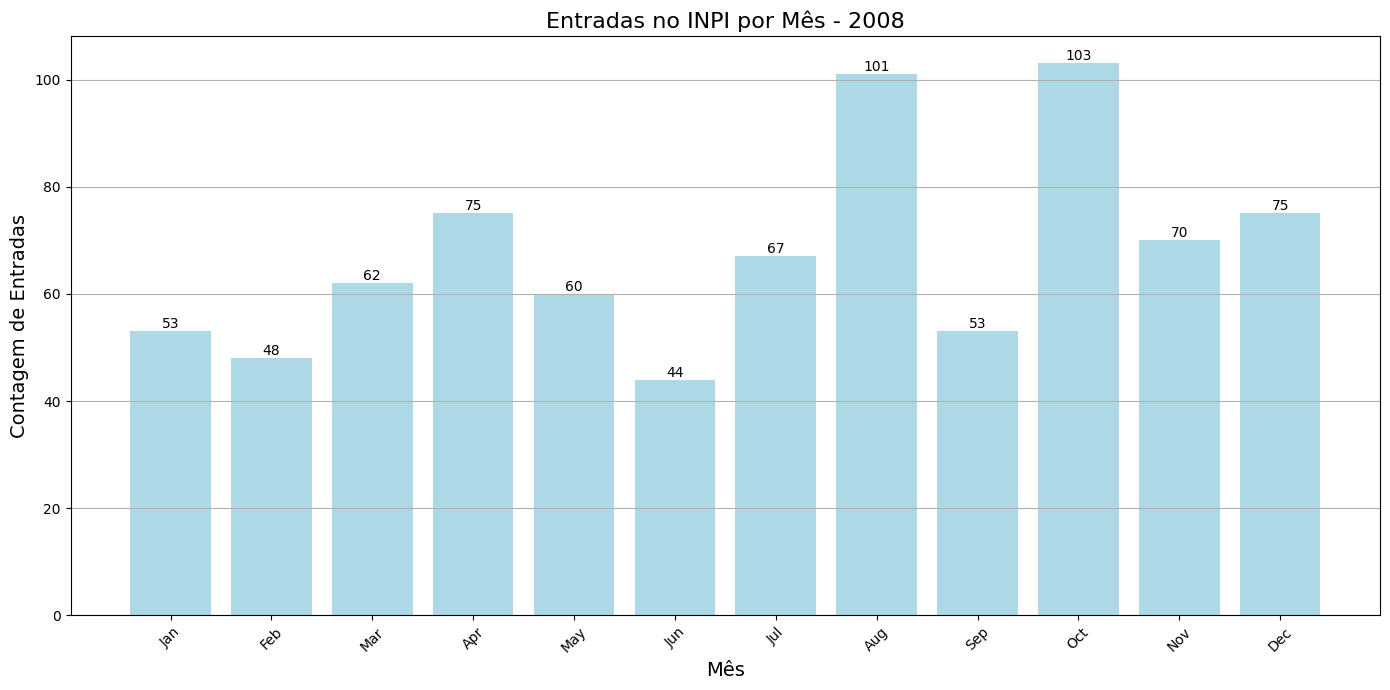

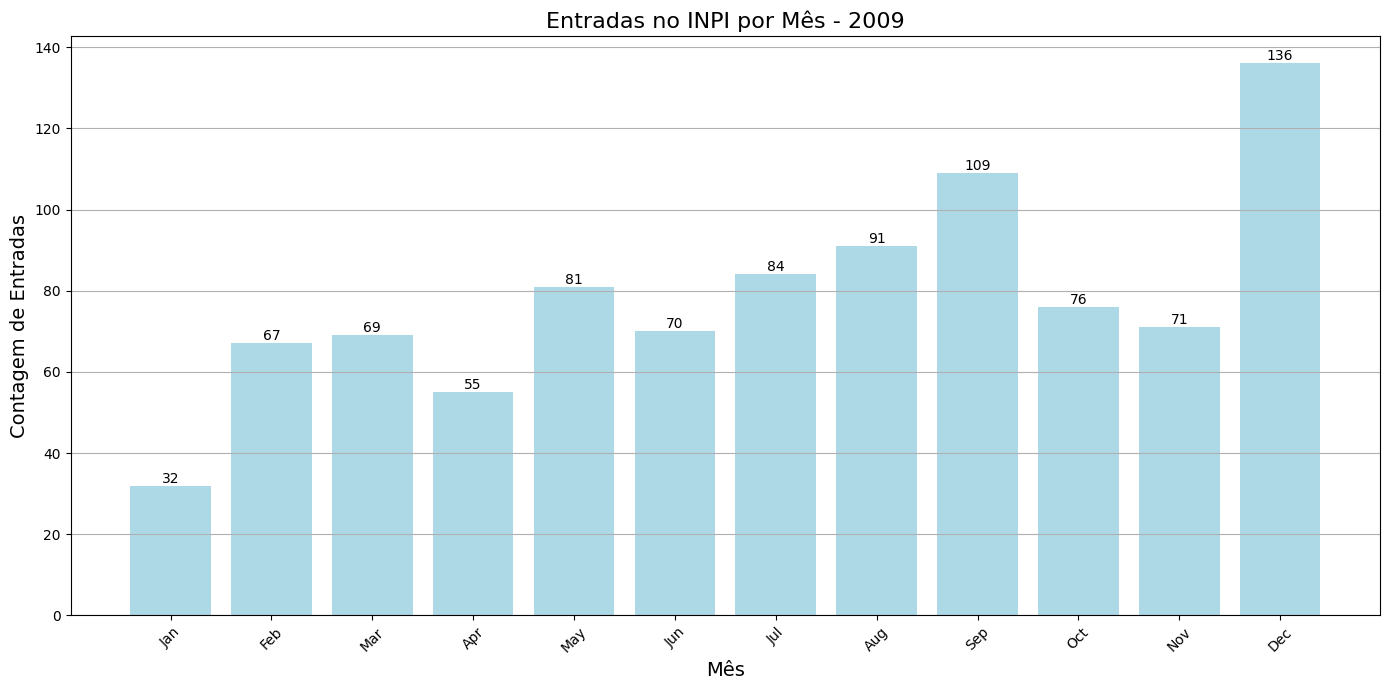

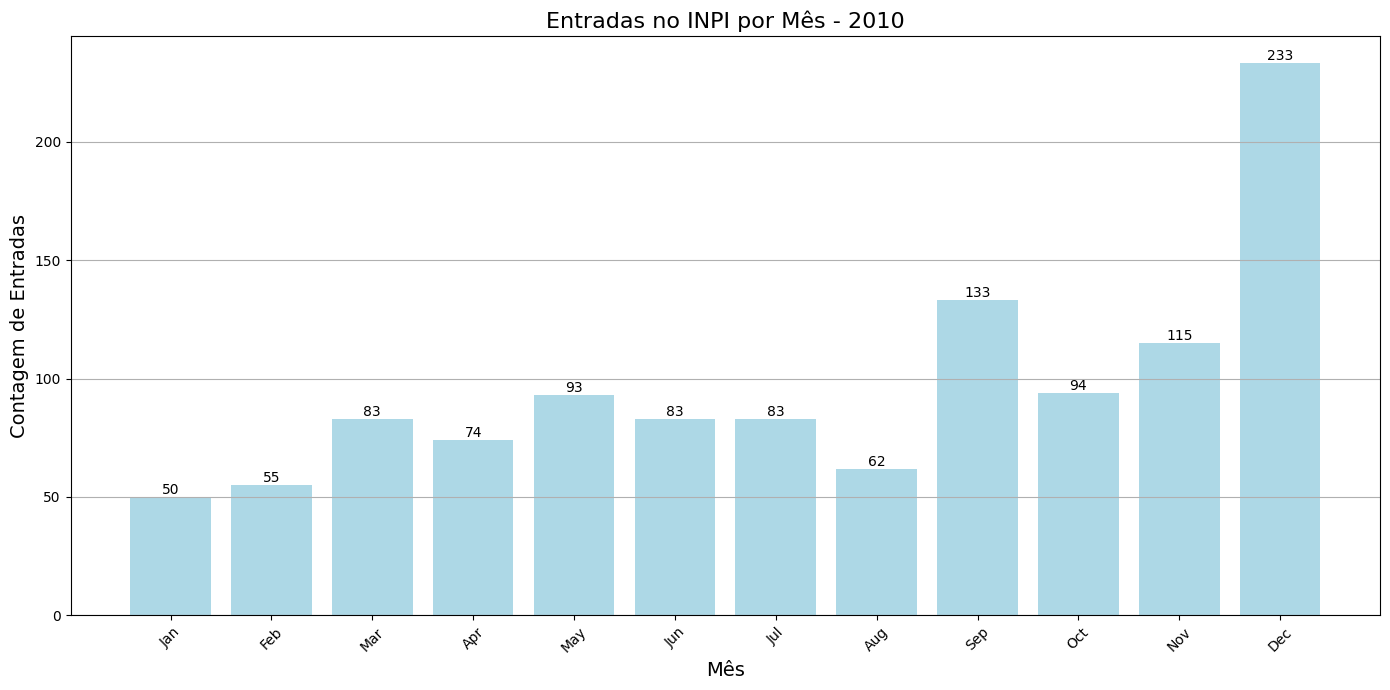

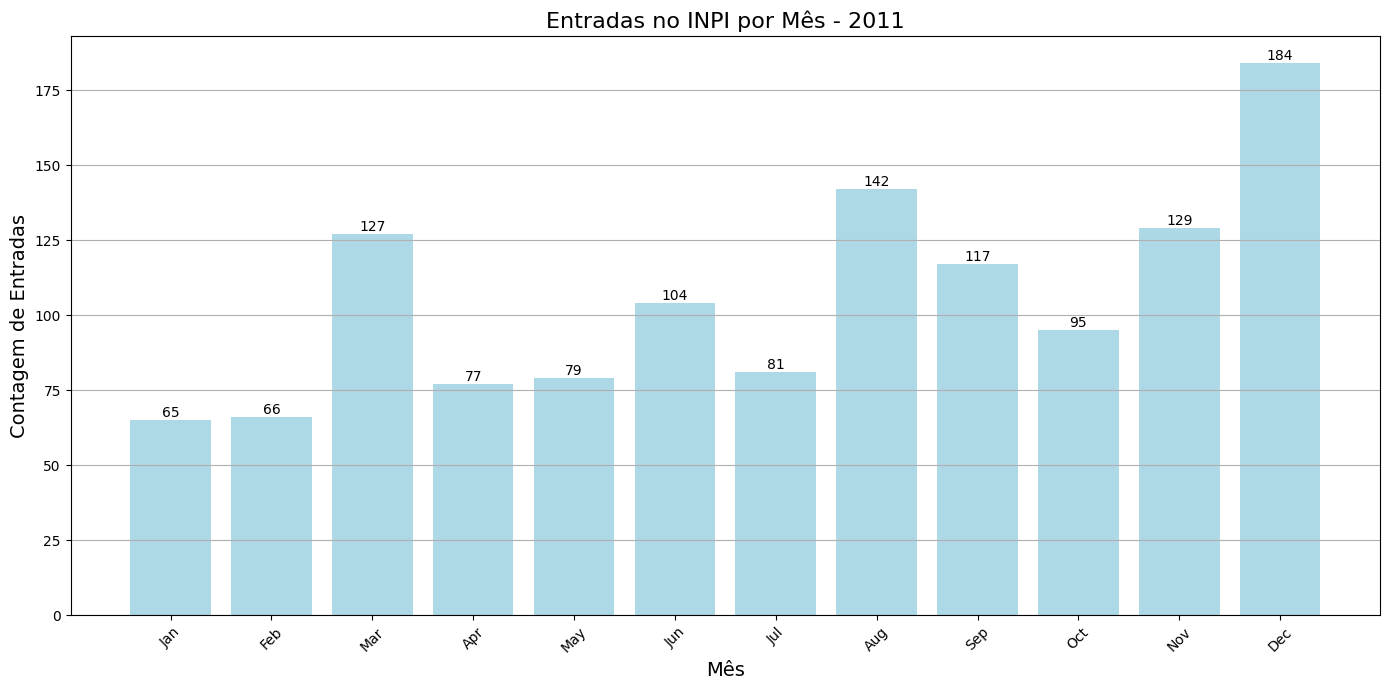

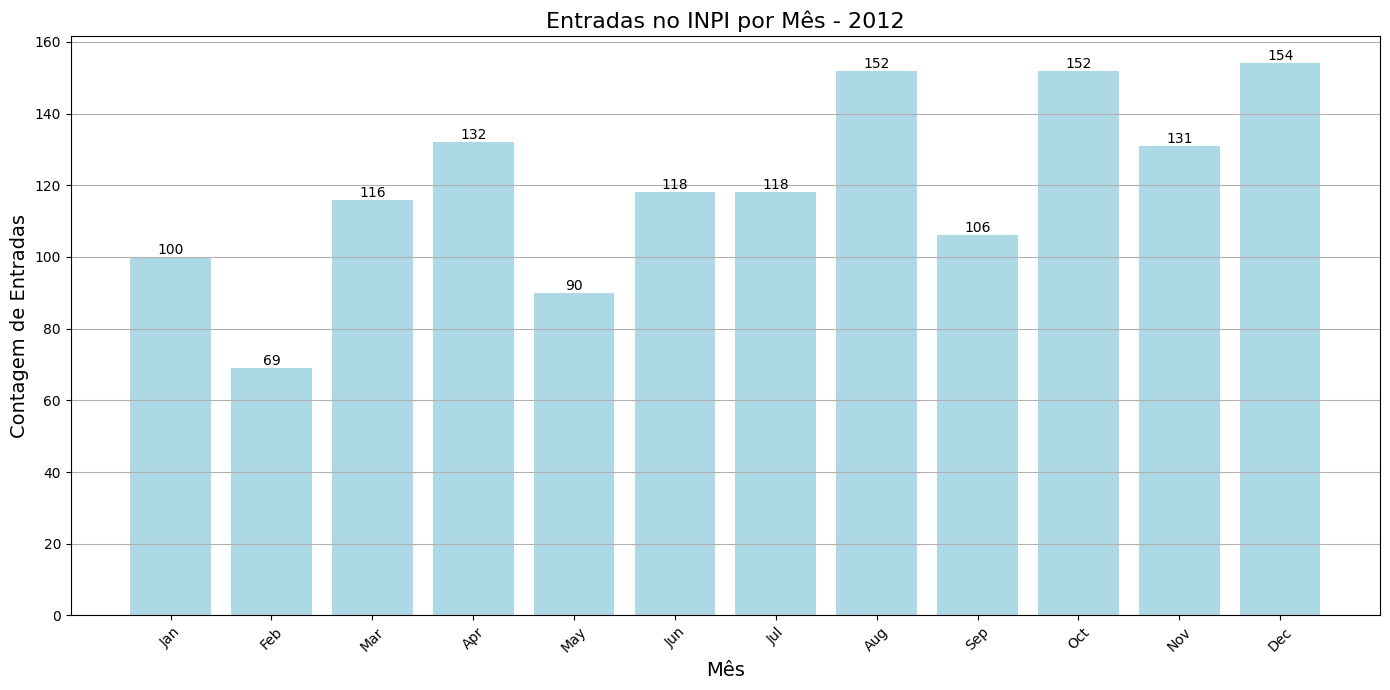

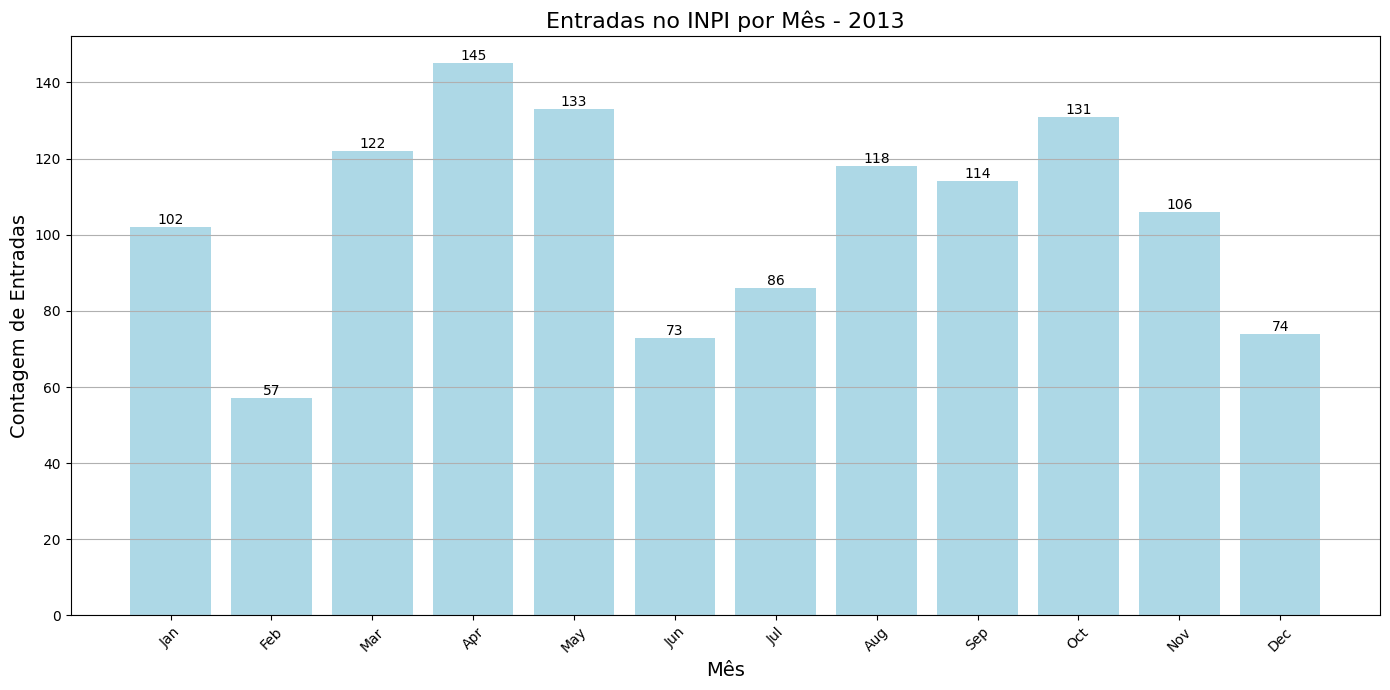

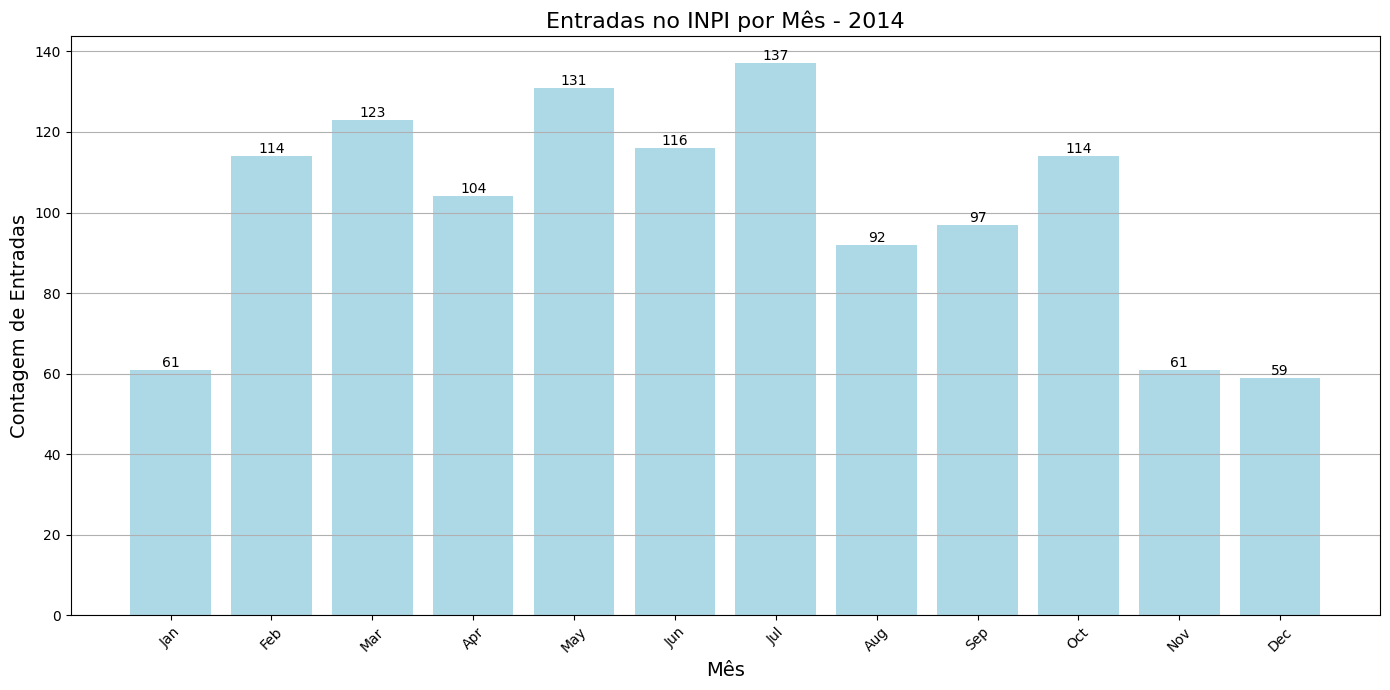

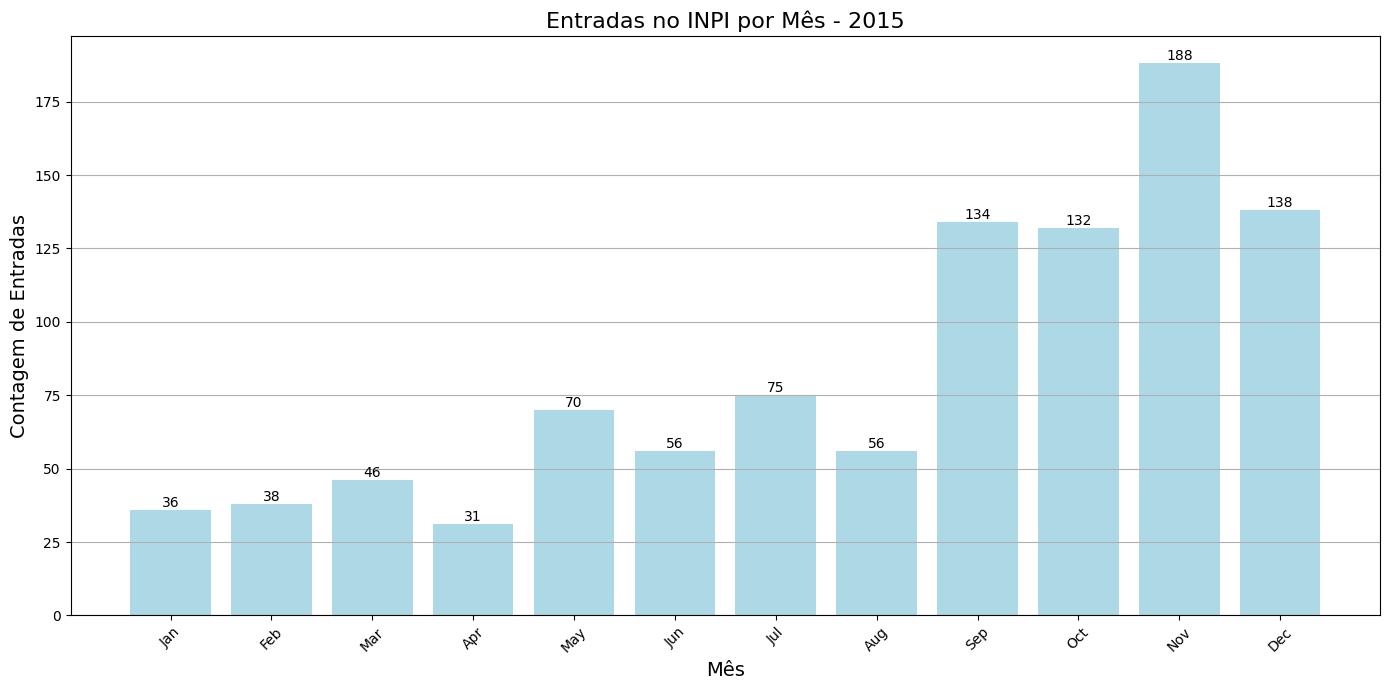

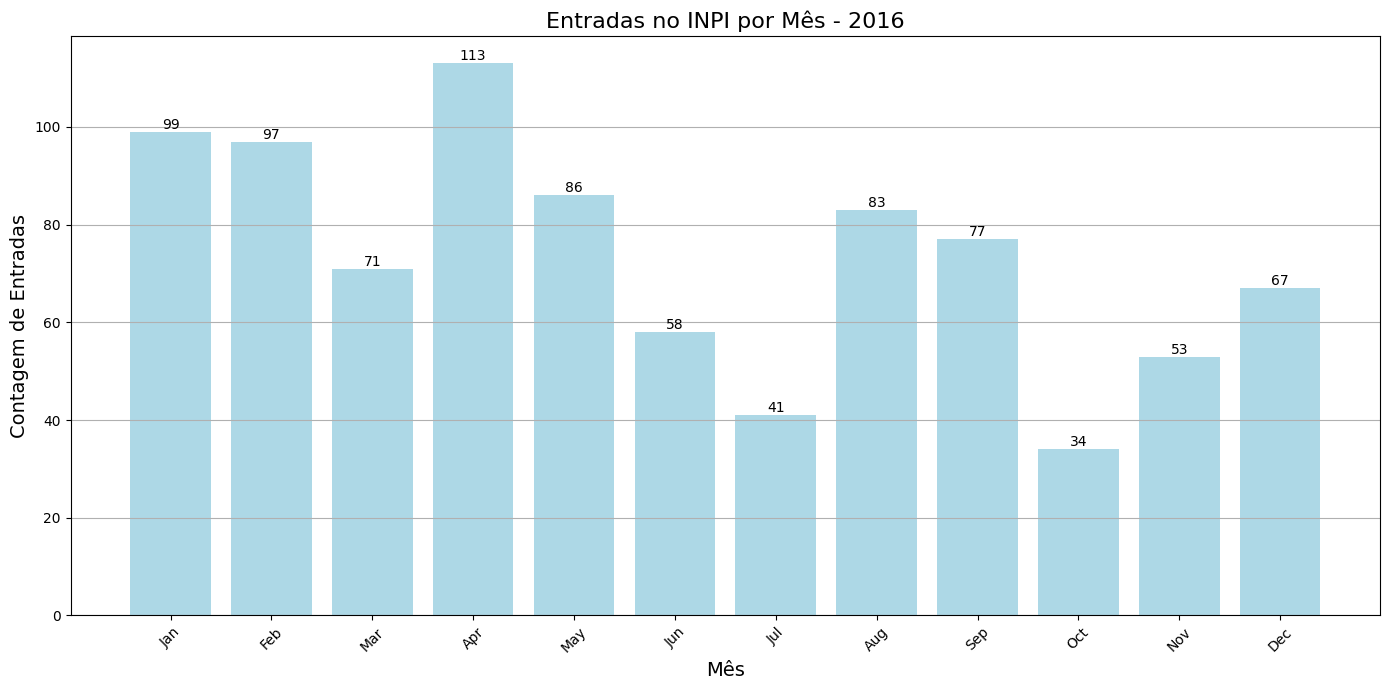

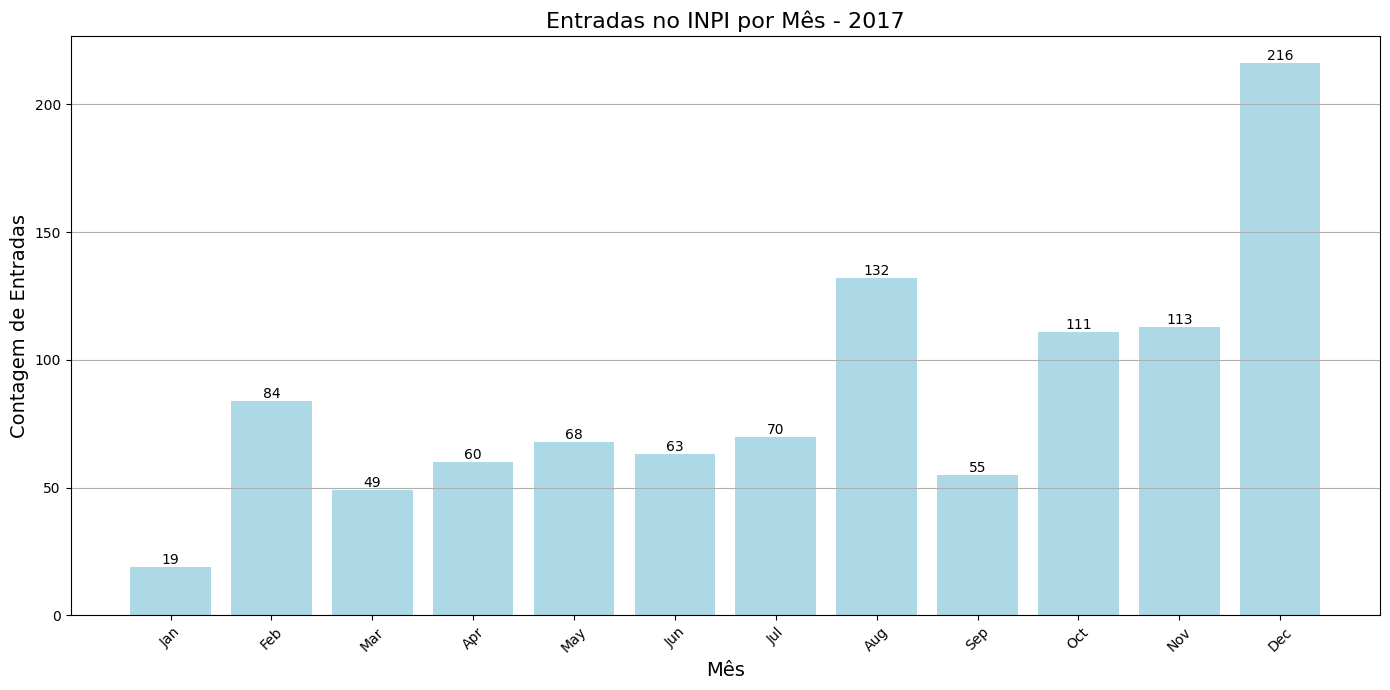

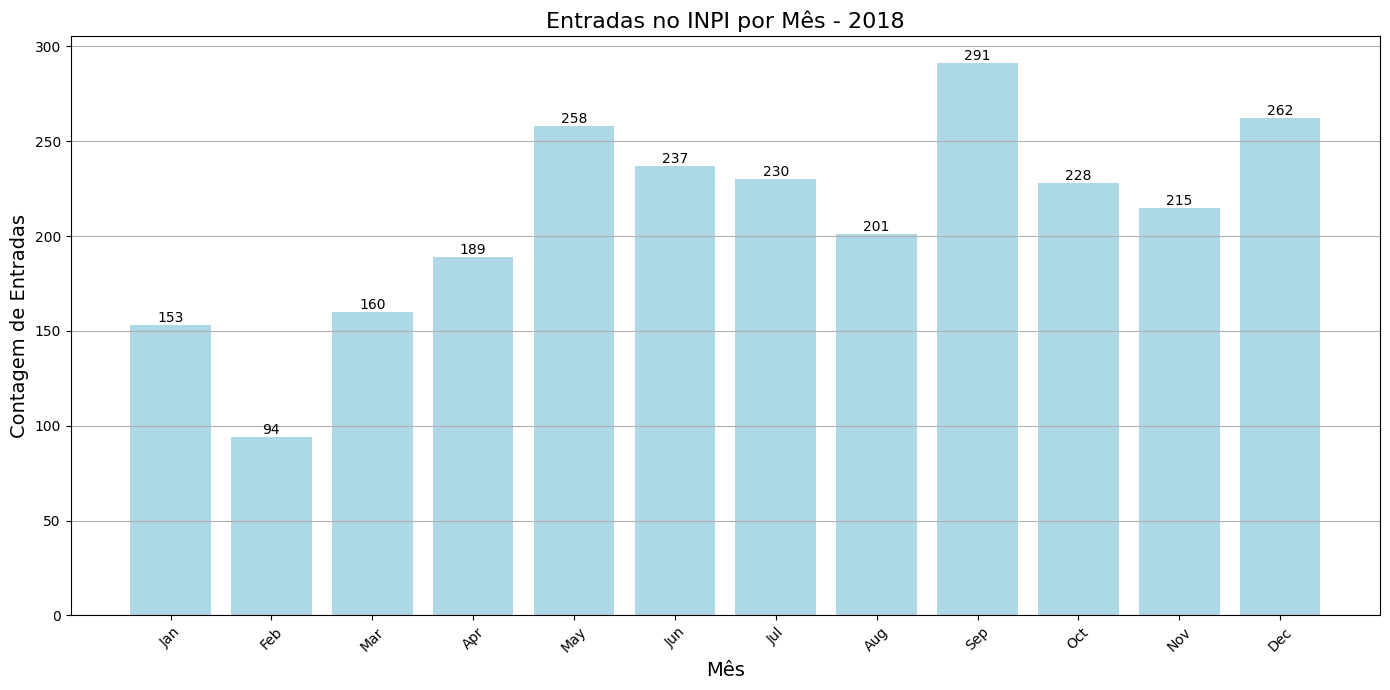

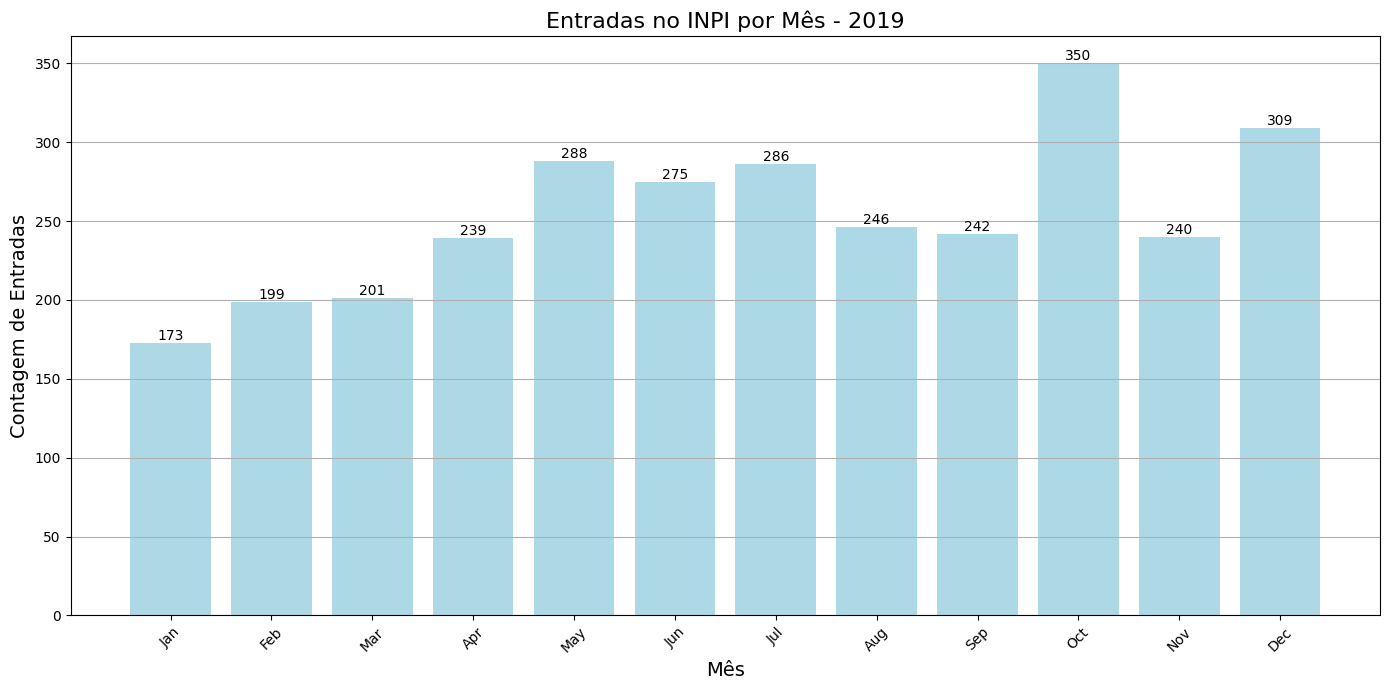

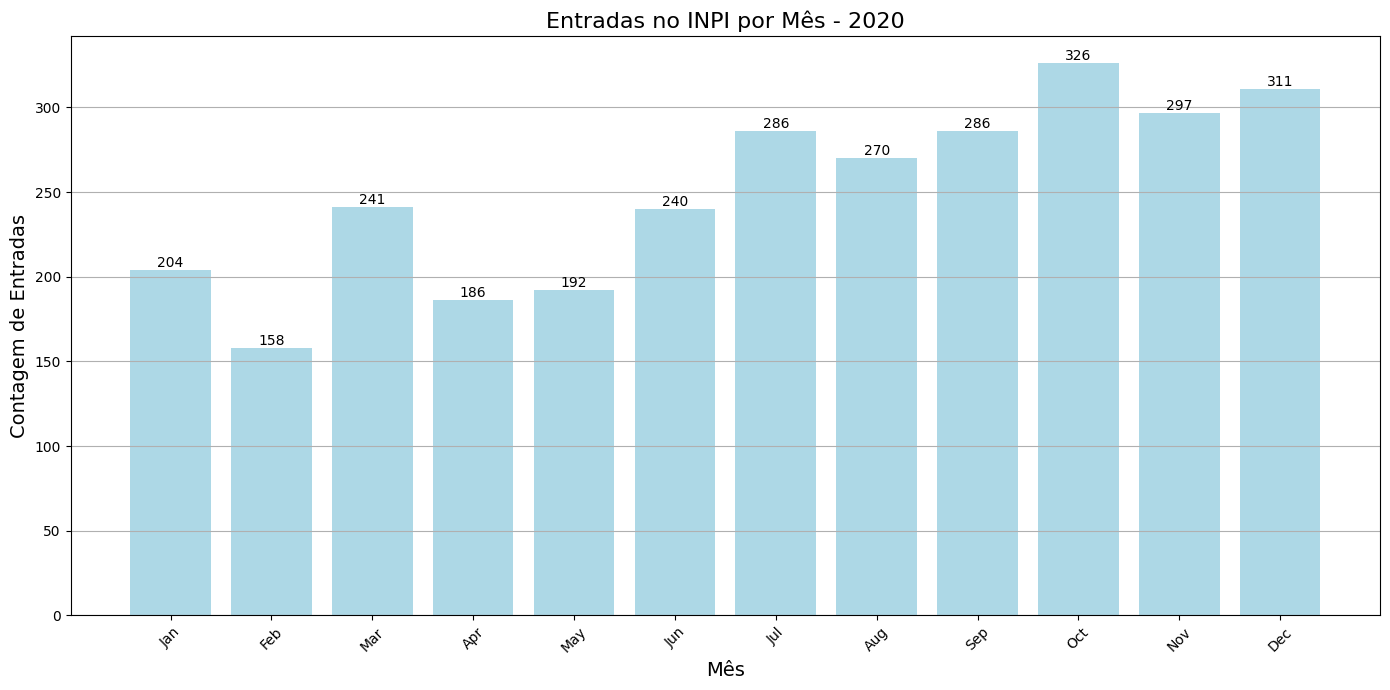

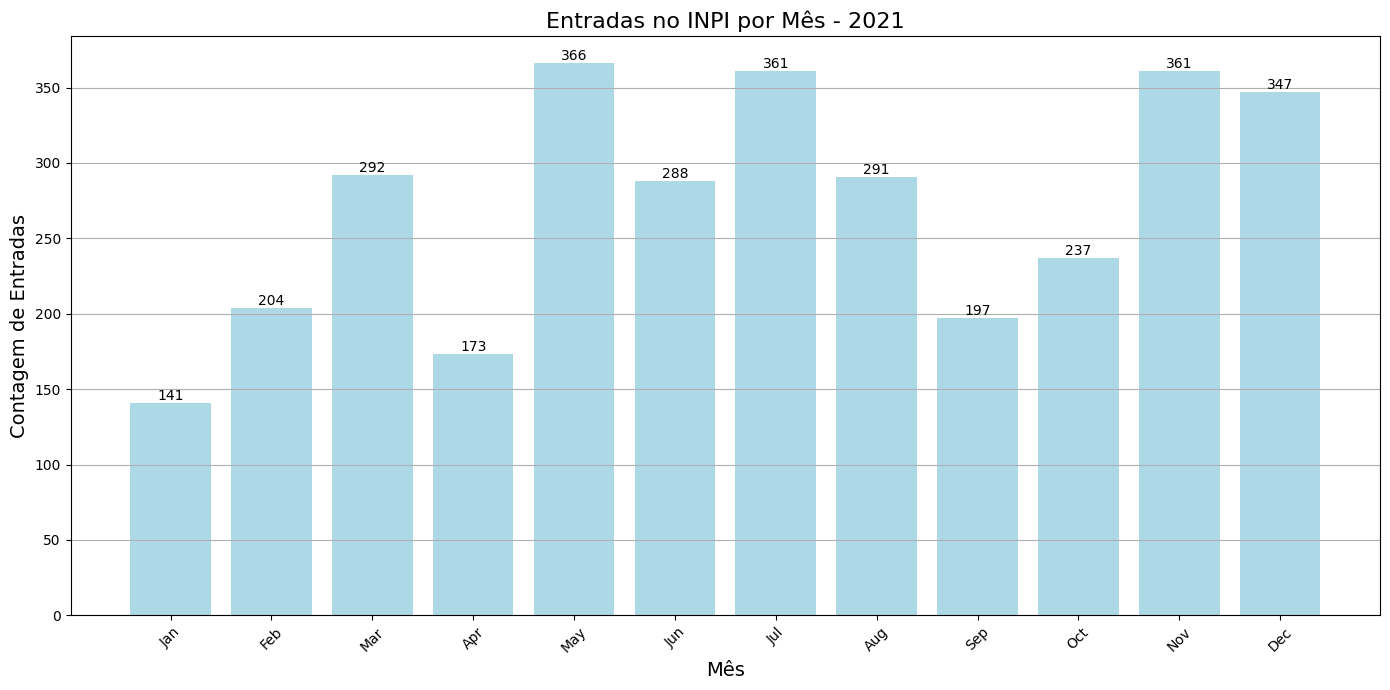

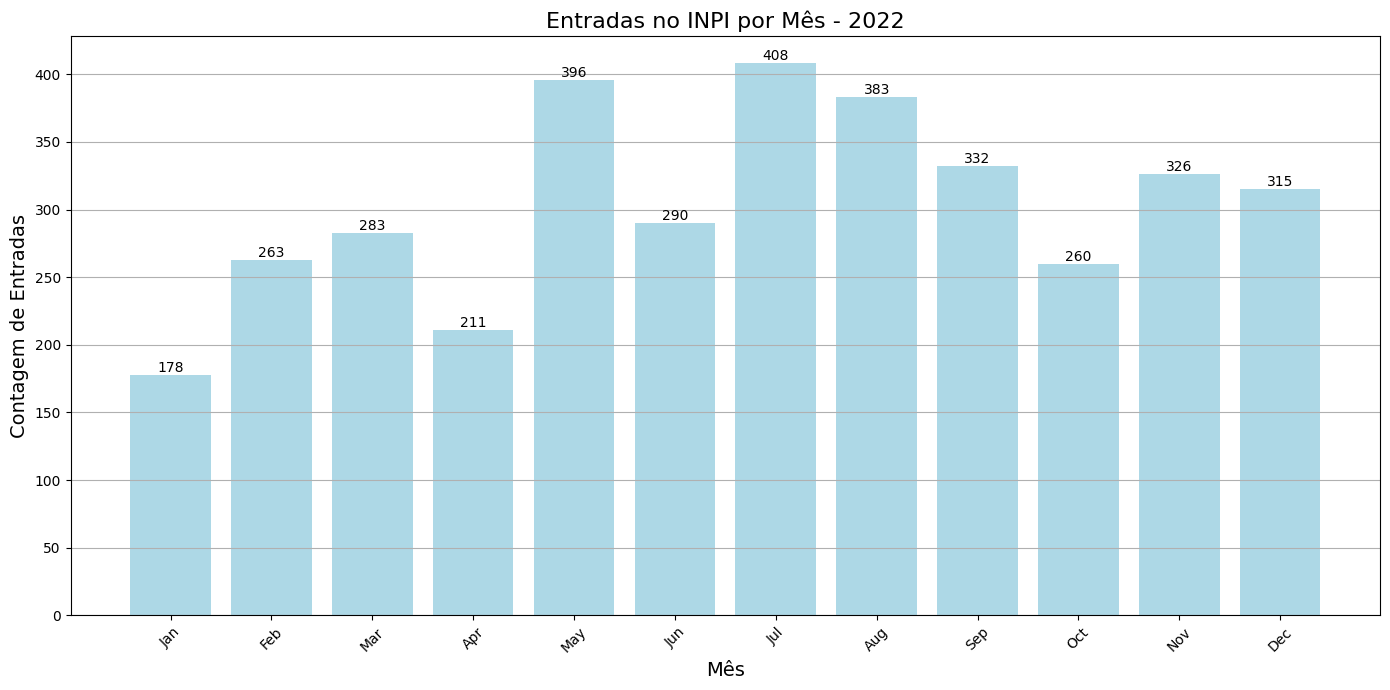

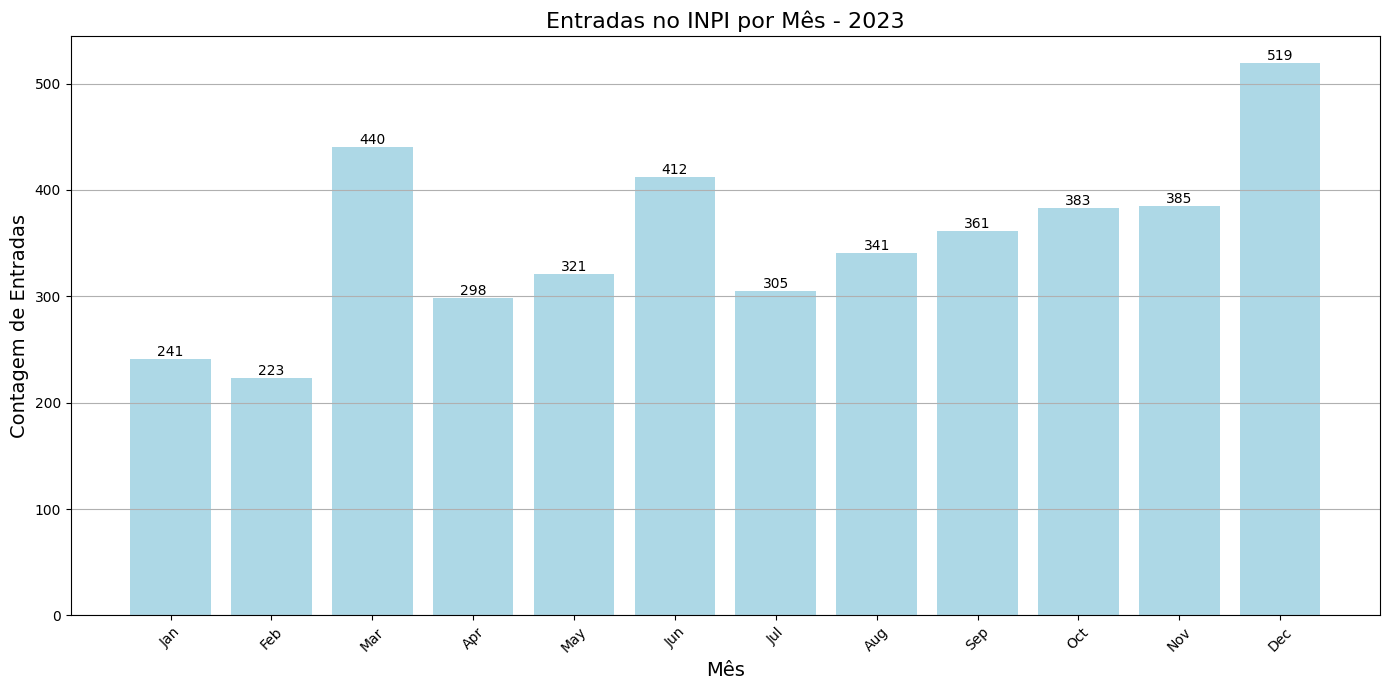

In [73]:

# Agrupando os dados por ano e mês
entrada_mensal = badepi_final.groupby(badepi_final['DT_ENTRADA_INPI'].dt.to_period('M')).size().reset_index(name='contagem')

# Convertendo de volta para DataTime
entrada_mensal['DT_ENTRADA_INPI'] = entrada_mensal['DT_ENTRADA_INPI'].dt.to_timestamp()

anos = entrada_mensal['DT_ENTRADA_INPI'].dt.year.unique()

for ano in anos:
    dados_ano = entrada_mensal[entrada_mensal['DT_ENTRADA_INPI'].dt.year == ano]

    plt.figure(figsize=(14, 7))
    plt.bar(dados_ano['DT_ENTRADA_INPI'].dt.strftime('%b'), dados_ano['contagem'], color='lightblue')
    plt.title(f'Entradas no INPI por Mês - {ano}', fontsize=16)
    plt.xlabel('Mês', fontsize=14)
    plt.ylabel('Contagem de Entradas', fontsize=14)
    plt.xticks(rotation=45)

    for index, value in enumerate(dados_ano['contagem']):
        plt.text(index, value, int(value), ha='center', va='bottom', fontsize=10)

    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


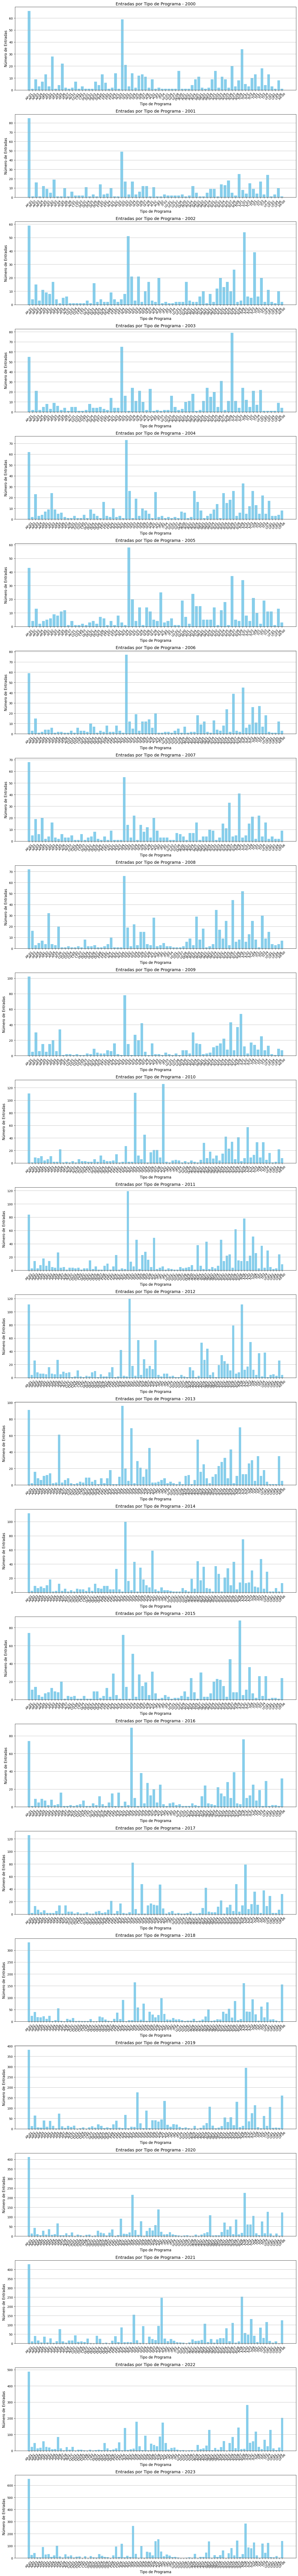

In [89]:
badepi_final['DT_ENTRADA_INPI'] = pd.to_datetime(badepi_final['DT_ENTRADA_INPI'])
badepi_final['Ano'] = badepi_final['DT_ENTRADA_INPI'].dt.year

# Agrupando os dados por ano e tipo de programa
tendencia_programa = badepi_final.groupby(['Ano', 'CD_TIPO_PROGRAMA']).size().reset_index(name='contagem')

# Criando subplots para cada ano
anos = tendencia_programa['Ano'].unique()
plt.figure(figsize=(14, 5 * len(anos)))

for i, ano in enumerate(anos):
    plt.subplot(len(anos), 1, i + 1)
    ano_data = tendencia_programa[tendencia_programa['Ano'] == ano]

    plt.bar(ano_data['CD_TIPO_PROGRAMA'], ano_data['contagem'], color='skyblue')
    plt.title(f'Entradas por Tipo de Programa - {ano}', fontsize=14)
    plt.xlabel('Tipo de Programa', fontsize=12)
    plt.ylabel('Número de Entradas', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [94]:
badepi_final.to_csv('badepi_final.csv', index=False)


In [95]:
from google.colab import files
files.download('badepi_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>